In [92]:
# 1. Загрузить набор данных из репозитория. Свой выбор данных  согласовать с преподавателем.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./data/global_cancer_patients_2015_2024.csv")

print(df.info())

df = df.drop_duplicates()

df = df.drop("Patient_ID", axis=1)
df = df.drop("Treatment_Cost_USD", axis=1)
df = df.drop("Year", axis=1)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

,Age,Gender,Country_Region,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score
0,71,Male,UK,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92
1,34,Male,China,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65
2,80,Male,Pakistan,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84
3,40,Male,UK,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12
4,43,Female,Brazil,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62


In [93]:
# 5. Отобрать и определить признаки, которые будут использоваться для построения моделей.

important_feat = [
    "Age",
    "Gender",
    "Country_Region",
    "Genetic_Risk",
    "Air_Pollution",
    "Alcohol_Use",
    "Smoking",
    "Obesity_Level",
    "Cancer_Type"
    "Cancer_Stage",
]

numeric_columns = [
    "Age",
    "Genetic_Risk",
    "Air_Pollution",
    "Alcohol_Use",
    "Smoking",
    "Obesity_Level",
    # "Treatment_Cost_USD",
    "Survival_Years",
    "Target_Severity_Score",
]


categorical_columns = [
    "Gender",
    "Country_Region",
    "Cancer_Type",
    "Cancer_Stage",
]

target = "Cancer_type"

In [94]:
df[numeric_columns] = MinMaxScaler().fit_transform(df[numeric_columns])
# Преобразование категориальных признаков
df[categorical_columns] = df[categorical_columns].apply(LabelEncoder().fit_transform) # type: ignore

df.head()

,Age,Gender,Country_Region,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score
0,0.739130,1,8,0.64,0.28,0.95,0.09,0.87,5,3,0.59,0.486683
1,0.202899,1,3,0.13,0.45,0.37,0.39,0.63,3,0,0.47,0.453995
2,0.869565,1,6,0.74,0.79,0.24,0.47,0.01,0,2,0.71,0.598063
3,0.289855,1,8,0.17,0.29,0.48,0.35,0.27,2,1,0.16,0.268765
4,0.333333,0,1,0.51,0.28,0.23,0.67,0.05,7,3,0.29,0.329298


Классификация до PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1262
           1       1.00      1.00      1.00      1231
           2       1.00      1.00      1.00      1283
           3       1.00      1.00      1.00      1233
           4       1.00      1.00      1.00      1259
           5       1.00      1.00      1.00      1230
           6       1.00      1.00      1.00      1269
           7       1.00      1.00      1.00      1233

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Accuracy: 0.9999


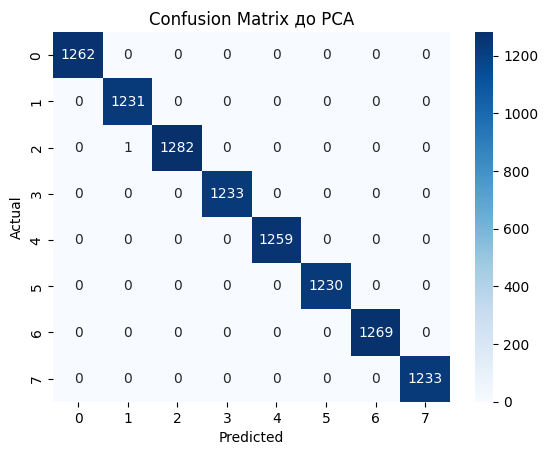

In [95]:
X = df
y = df["Cancer_Type"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


print("Классификация до PCA:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix до PCA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [96]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="Set1", alpha=0.6)
# plt.xlabel("PCA 1")
# plt.ylabel("PCA 2")
# plt.title("PCA визуализация")
# plt.colorbar()
# plt.show()

Классификация после PCA:
              precision    recall  f1-score   support

           0       0.18      0.33      0.23      1262
           1       0.14      0.18      0.16      1231
           2       0.16      0.17      0.17      1283
           3       0.13      0.11      0.12      1233
           4       0.13      0.10      0.11      1259
           5       0.15      0.12      0.13      1230
           6       0.16      0.13      0.14      1269
           7       0.20      0.15      0.17      1233

    accuracy                           0.16     10000
   macro avg       0.16      0.16      0.15     10000
weighted avg       0.16      0.16      0.15     10000

Accuracy: 0.1589


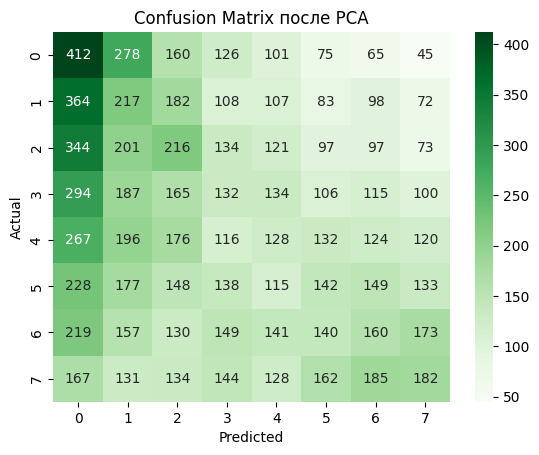

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)


y_pred_pca = knn_pca.predict(X_test_pca)


print("Классификация после PCA:")
print(classification_report(y_test_pca, y_pred_pca))
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))

# выводы по алгоритму снижения размерности

sns.heatmap(
    confusion_matrix(y_test_pca, y_pred_pca), annot=True, fmt="d", cmap="Greens"
)
plt.title("Confusion Matrix после PCA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [98]:
print("Точность до уменьшения размерности:", accuracy_score(y_test, y_pred))
print("Точность после уменьшения размерности:", accuracy_score(y_test_pca, y_pred_pca))

Точность до уменьшения размерности: 0.9999
Точность после уменьшения размерности: 0.1589
